# Calculate Option Price

## Using the Black Scholes Formula

In [61]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt  

$$
d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{stdev^2}{2})t}{s \cdot \sqrt{t}}
$$

$$
d_2 = d_1 - s \cdot \sqrt{t} = \frac{\ln(\frac{S}{K}) + (r - \frac{stdev^2}{2})t}{s \cdot \sqrt{t}}
$$

In [62]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

$$
\textbf{C} = SN(d_1) - Ke^{-rt}N(d_2) 
$$

In [63]:
def BSM(S, K, r, stdev, T):
        return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [64]:
data = pd.read_csv('PG_2007_2017.csv', index_col = 'Date')

In [65]:
S = data.iloc[-1]
S

PG    88.118629
Name: 2017-04-10, dtype: float64

In [66]:
log_returns = np.log(1 + data.pct_change())

In [67]:
stdev = log_returns.std() * (250 ** 0.5)
stdev

PG    0.176109
dtype: float64

In [68]:
r = 0.025
K = 110.0
T = 1 # year

In [69]:
d1(S, K, r, stdev, T)

PG   -1.029416
dtype: float64

In [70]:
d2(S, K, r, stdev, T)

PG   -1.205525
dtype: float64

In [71]:
BSM(S, K, r, stdev, T)

PG    1.132067
Name: 2017-04-10, dtype: float64

## Euler Discretization

Compute the price of a call option in a more sophisticated way.

As a financier, you'd like to run thousands of experiments to be sure the price you pick will be the most accurate one.

Monte Carlo simulations can provide use with thousands of possible call option prices. Then we could average the payoff and discount it back to today.

In [72]:
log_returns = np.log(1 + data.pct_change())

The formula we'll use to calculate the future prices is another version of a Brownian motion called Euler Discretization.

$$
{\LARGE S_t = S_{t-1} \mathbin{\times} e^{((r - \frac{1}{2} \times stdev^2) \mathbin{\times} \delta_t + stdev \mathbin{\times} \sqrt{\delta_t} \mathbin{\times} Z_t)}  }
$$
<br /><br />

- $S_t$: stock price at day $t$
- $\delta_t$: fixed time interval

In [73]:
r = 0.025

In [74]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176109
dtype: float64

In [75]:
stdev = stdev.values
stdev

array([0.17610875])

In [76]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [77]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

In [78]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [79]:
S

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 88.79444151,  88.6867148 ,  88.94221407, ...,  88.9750861 ,
         88.31727019,  87.38798033],
       [ 88.71217683,  88.44229951,  88.92926148, ...,  89.77931436,
         87.85528337,  86.41663489],
       ...,
       [ 72.35613326,  82.43486573,  83.81036199, ..., 105.65007338,
         76.12631732,  84.27862657],
       [ 72.18903191,  81.7220661 ,  84.26526589, ..., 105.51162233,
         75.07832329,  84.99048591],
       [ 71.35324992,  81.71908447,  85.7502944 , ..., 106.39653377,
         74.12686603,  83.26951933]])

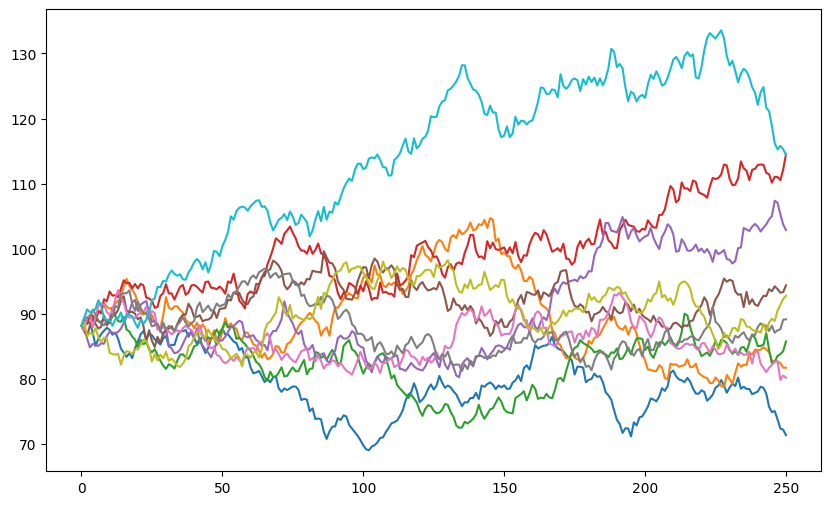

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

Calculate payoff

In [81]:
p = np.maximum(S[-1] - 110, 0)
p

array([0., 0., 0., ..., 0., 0., 0.])

Calculate call option's price
$$
C = \frac{e^{-rt} \times \sum{p_i}}{iterations}
$$

In [82]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

1.0820799741979616